### Creating and plotting discrete colour bars for Raster data

In this example I adjust some code from stackoverflow (link in code below) to apply to a k-means unsupervised classification of an image of the isle of wight - You can try this with your own data. If you are interested in k-means and satellite imagery please visit by blog here http://www.acgeospatial.co.uk/k-means-sentinel-2-python/
<br>
A blog post associated with this code describing what is going on is here http://www.acgeospatial.co.uk/colour-bar-for-discrete-rasters-with-matplotlib/

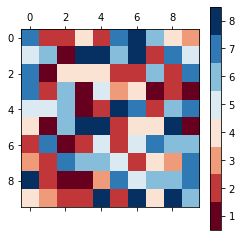

In [1]:
%matplotlib inline
## take from https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar
import matplotlib.pyplot as plt
import numpy as np
def discrete_matshow(data):
    #get discrete colormap
    cmap = plt.get_cmap('RdBu', np.max(data)-np.min(data)+1)
    # set limits .5 outside true range
    mat = plt.matshow(data,cmap=cmap,vmin = np.min(data)-.5, vmax = np.max(data)+.5)
    #tell the colorbar to tick at integers
    cax = plt.colorbar(mat, ticks=np.arange(np.min(data),np.max(data)+1))
a=np.random.randint(1, 9, size=(10, 10))
discrete_matshow(a)

In [2]:
import numpy as np
from sklearn import cluster
from osgeo import gdal, gdal_array
# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

# Read in raster image 
img_ds = gdal.Open('.../image.tif', gdal.GA_ReadOnly)


img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),
               gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))

for b in range(img.shape[2]):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()
    
print (img.shape)

#reshape
X = img.reshape((-1,img.shape[2]))
print (X.shape)

(2272, 3847, 3)
(8740384, 3)


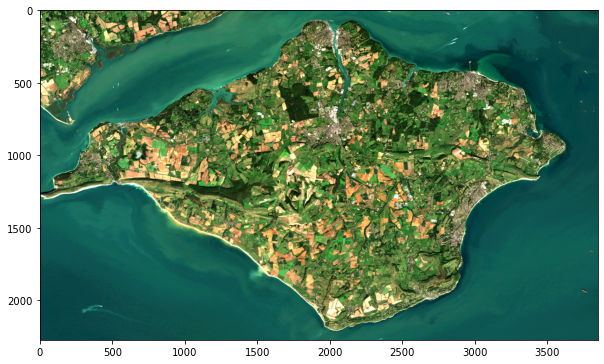

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [6]:
k_means = cluster.KMeans(n_clusters=5)
k_means.fit(X)

X_cluster = k_means.labels_


X_cluster = X_cluster.reshape(img[:, :, 0].shape) # single band

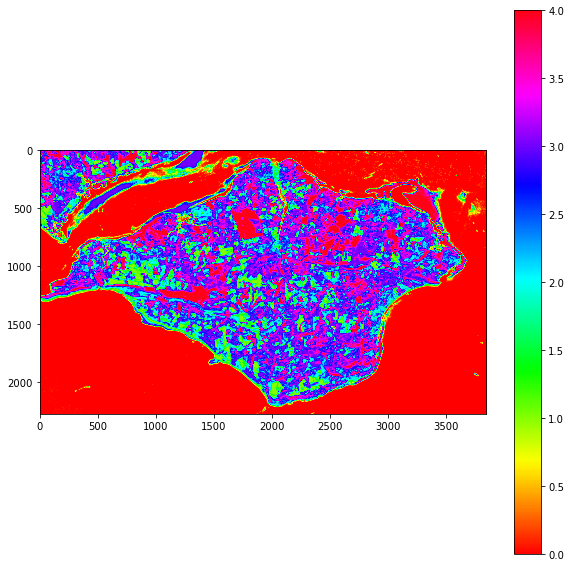

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(X_cluster, cmap="hsv")
plt.colorbar()
plt.show()

<Figure size 720x720 with 0 Axes>

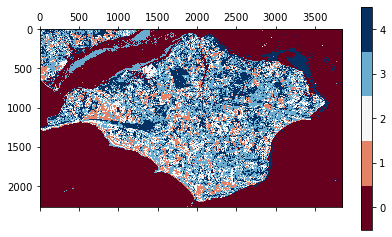

In [8]:
plt.figure(figsize=(10,10))
discrete_matshow(X_cluster)

In [9]:
def discrete_matshow2(data):
    #get discrete colormap
    cmap = plt.get_cmap('hsv', np.max(data)-np.min(data)+1)
    # set limits .5 outside true range
    plt.figure(figsize=(10,10)) ## increase fig size
    mat = plt.matshow(data,cmap=cmap,vmin = np.min(data)-.5, vmax = np.max(data)+.5, fignum=1) ## added fignum
    #tell the colorbar to tick at integers
    plt.colorbar(mat, ticks=np.arange(np.min(data),np.max(data)+1), shrink=0.5) ## added shrink
    

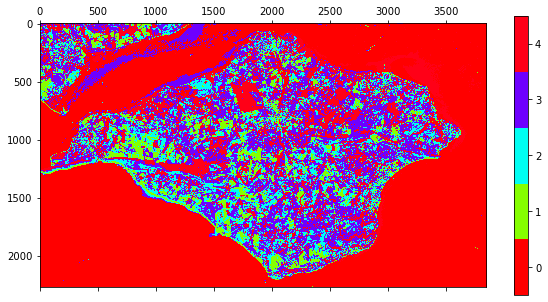

In [10]:
discrete_matshow2(X_cluster)

In [11]:
print(np.unique(X_cluster))

[0 1 2 3 4]


An attempt at displaying 2 layers with some transparency

In [12]:
def discrete_matshow3(data):
    #get discrete colormap
    cmap = plt.get_cmap('hsv', np.max(data)-np.min(data)+1)
    # set limits .5 outside true range
    plt.figure(figsize=(20,20)) ## increase fig size
    mat = plt.imshow(data,cmap=cmap,vmin = np.min(data)-.5, vmax = np.max(data)+.5, zorder=2, alpha=0.2) ## added fignum
    #tell the colorbar to tick at integers
    plt.colorbar(mat, ticks=np.arange(np.min(data),np.max(data)+1), shrink=0.5)## added shrink
    plt.imshow(img[:,:,:], zorder=1, alpha = 0.5)

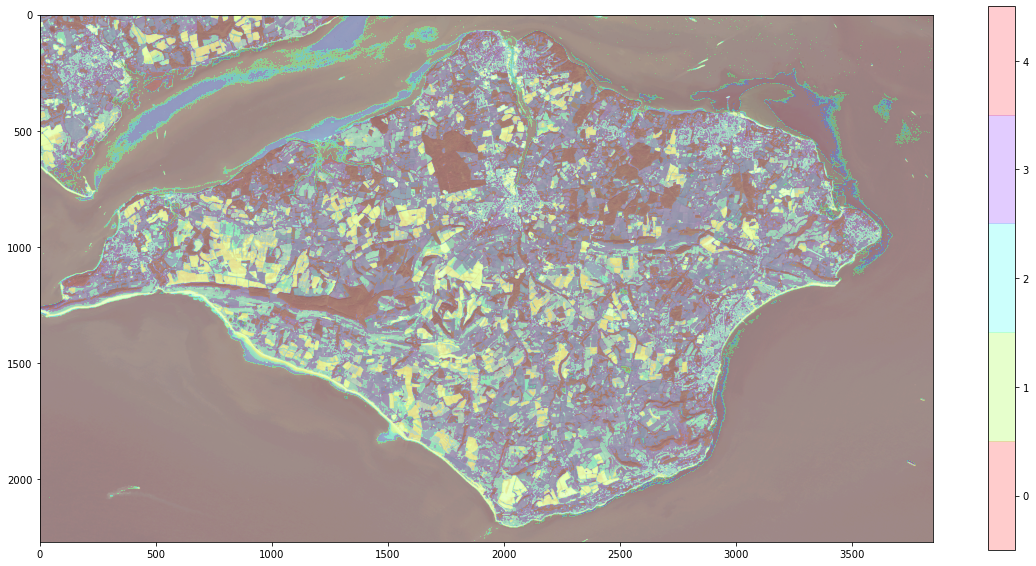

In [13]:
discrete_matshow3(X_cluster)